In [5]:
import pandas as pd

# using the kaggle csv
df = pd.read_csv('data.csv')
df.head()

,filename,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00081.au,103.359375,50,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272,-26.929785,...,14.336612,-13.821769,7.562789,-6.181372,0.330165,-6.829571,0.965922,-7.570825,2.918987,blues
1,blues.00022.au,95.703125,44,0.306451,0.113475,1156.070496,1497.668176,2170.053545,0.058613,-233.860772,...,-2.250578,3.959198,5.322555,0.812028,-1.107202,-4.556555,-2.436490,3.316913,-0.608485,blues
2,blues.00031.au,151.999081,75,0.253487,0.151571,1331.073970,1973.643437,2900.174130,0.042967,-221.802549,...,-13.037723,-12.652228,-1.821905,-7.260097,-6.660252,-14.682694,-11.719264,-11.025216,-13.387260,blues
3,blues.00012.au,184.570312,91,0.269320,0.119072,1361.045467,1567.804596,2739.625101,0.069124,-207.208080,...,-0.613248,0.384877,2.605128,-5.188924,-9.527455,-9.244394,-2.848274,-1.418707,-5.932607,blues
4,blues.00056.au,161.499023,74,0.391059,0.137728,1811.076084,2052.332563,3927.809582,0.075480,-145.434568,...,7.457218,-10.470444,-2.360483,-6.783623,2.671134,-4.760879,-0.949005,0.024832,-2.005315,blues


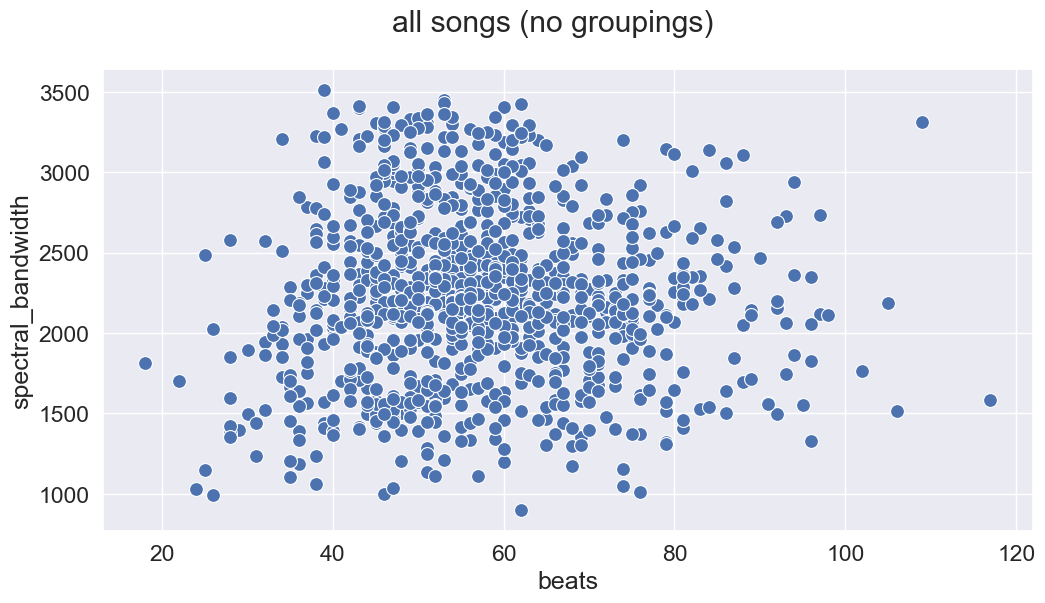

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale=1.5)

# df_penguin = sns.load_dataset('penguins')
# df_penguin.dropna(axis=0, how='any', inplace=True)

sns.scatterplot(data=df, x='beats', y='spectral_bandwidth', s=100)
plt.gcf().set_size_inches(12, 6)
plt.suptitle('all songs (no groupings)');

In [3]:
from sklearn.cluster import KMeans

# k in k-means describes the number of clusters
n_clusters = 9

# extract x features (define distance between samples)
x_feat_list = ['beats', 'spectral_bandwidth']
x = df.loc[:, x_feat_list].values

# perform clustering
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(x)
y = kmeans.predict(x)

c:\Users\alina\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<mark>Should we change the clusters?</mark>

Text(0.5, 0.98, 'clusters of songs (similar beats and spectral bandwidth)')

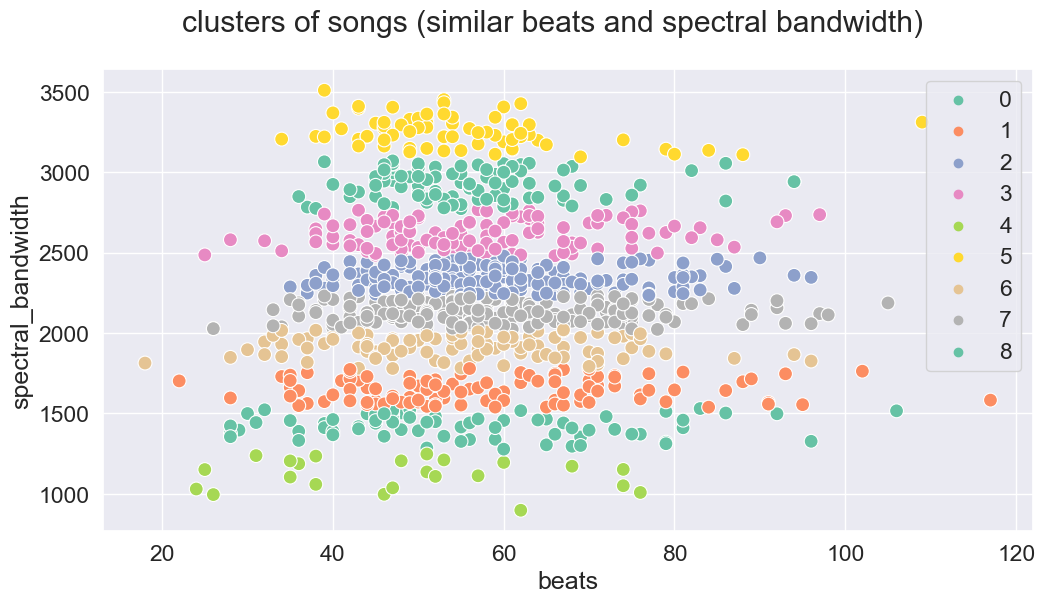

In [4]:
sns.scatterplot(data=df, x='beats', y='spectral_bandwidth', s=100, hue=y, palette='Set2')
plt.gcf().set_size_inches(12, 6)
plt.suptitle('clusters of songs (similar beats and spectral bandwidth)')